In [33]:
import pandas as pd
# 데이터 로드
train=pd.read_csv("C:/Users/MYCOM/data/kaggle_storesales/train.csv (1)/train.csv")
holidays=pd.read_csv("C:/Users/MYCOM/data/kaggle_storesales/holidays_events.csv")
oil=pd.read_csv("C:/Users/MYCOM/data/kaggle_storesales/oil.csv")
stores=pd.read_csv("C:/Users/MYCOM/data/kaggle_storesales/stores.csv")
test=pd.read_csv("C:/Users/MYCOM/data/kaggle_storesales/test.csv")

In [3]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


NaN값 확인

In [8]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [9]:
holidays.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [10]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [11]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [12]:
test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

1) oil 데이터 nan값 확인

In [31]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [36]:
# oil이 시계열 데이터라는 점을 감안하여 nan 값을 뒤의 값을 대체
oil = oil.interpolate(method='bfill')  # 뒷 값(backward fill)으로 대체

# 결과 출력
print("Time Series Oil data with NaN Filling:")
oil.head()

Time Series Oil data with NaN Filling:


,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [37]:
oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

In [88]:
from datetime import datetime

# 시작 날짜와 종료 날짜 설정
start_date = datetime(2013, 1, 1)
end_date = datetime(2017, 8, 31)

# 두 날짜 사이의 일 수 계산
days_difference = (end_date - start_date).days + 1

# 결과 출력
print(f"2013년 1월 1일부터 2017년 8월 31일까지의 일 수: {days_difference}일")

2013년 1월 1일부터 2017년 8월 31일까지의 일 수: 1704일


In [89]:
oil.shape

(1218, 2)

2013년 1월 1일부터 2017년 8월 31일까지 수는 1704인데 oil 데이터의 행 개수는 1218임. 따라서 oil에 date에서 아예 누락된 날짜가 있음

따라서 oil 데이터를 아예 따로 만들기
먼저 2013년 1월 1일부터 2017년 8월 31일까지 '누락 없는' date을 열로 가지는 데이터 프레임 만들기> 이때 date변수는 기존 oil데이터에서와 같이 object형이어야함!

In [119]:
oil_p = {'date': pd.date_range(start='2013-01-01', end='2017-08-31')}
oil_p = pd.DataFrame(oil_p)
oil_p['date'] = oil_p['date'].dt.strftime('%Y-%m-%d')
oil_p.head()

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [120]:
oil_p.shape

(1704, 1)

In [122]:
print(oil['date'].dtype)
print(oil_p['date'].dtype)

object
object


oil_p와 기존 oil 데이터를 date를 매개로 해서 병합

이때 how='outer'로 누락없이 병합

In [123]:
oil_p=pd.merge(oil_p,oil,on='date',how='outer')
oil_p.head()

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,NaN


In [124]:
oil_p.isnull().sum()

date            0
dcoilwtico    486
dtype: int64

이때 누락값이 있을 수밖에 없음

따라서 이때 누락값은 시계열 데이터임을 감안하여 위아래의 평균으로 대체해주기

In [125]:
oil_p = oil_p.interpolate()

In [126]:
oil_p.isnull().sum()
# 누락된 값이 없음을 확인

date          0
dcoilwtico    0
dtype: int64

2) stores 데이터의 cluster 변수 의미 확인

In [15]:
stores['type'].value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

In [18]:
# store cluster를 위에 city, state, type으로 17개 cluster 생성한 것으로 가정
# cluster가 잘 되었는지 실루엣 계수 통해 확인
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

stores_c=pd.DataFrame()
# 명목형 변수를 숫자로 변환
stores_c['city'] = label_encoder.fit_transform(stores['city'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 명목형 변수를 숫자로 변환
stores_c['state'] = label_encoder.fit_transform(stores['state'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 명목형 변수를 숫자로 변환
stores_c['type'] = label_encoder.fit_transform(stores['type'])

# 결과 출력
stores_c.head()

,city,state,type
0,18,12,3
1,18,12,3
2,18,12,3
3,18,12,3
4,21,14,3


In [25]:
stores.columns

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')

In [26]:
# 명목형 변수를 숫자로 변환 (원핫 인코딩)
stores_cl = pd.get_dummies(stores, columns=['city','state','type'])

In [29]:
stores_cl.head()

,store_nbr,cluster,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E
0,1,13,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2,13,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,3,8,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,9,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,5,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
stores['cluster'].head()

0    13
1    13
2     8
3     9
4     4
Name: cluster, dtype: int64

In [23]:
from sklearn.preprocessing import MinMaxScaler
# Min-Max Scaling을 위한 scaler 객체 생성
scaler = MinMaxScaler()

# 데이터를 [0, 1] 범위로 변환
stores_c = scaler.fit_transform(stores_c)
#실루엣 계수 계산
silhouette_avg = silhouette_score(stores_c, stores['cluster'])
print(f"전체 데이터셋에 대한 실루엣 계수: {silhouette_avg}")

전체 데이터셋에 대한 실루엣 계수: -0.2613212894809991


In [30]:
#실루엣 계수 계산
silhouette_avg = silhouette_score(stores_cl, stores['cluster'])
print(f"전체 데이터셋에 대한 실루엣 계수: {silhouette_avg}")

전체 데이터셋에 대한 실루엣 계수: -0.12682254004434956


[INSIGHT] stores의 city, state, type 변수를 labelencoding, onehotencoding 해서 숫자형 데이터로 바꾼 후 실루엣 계수를 확인한 결과 각각 -0.26,-0.127로 실루엣 계수가 매우 낮음. 따라서 위 stores 데이터의 cluster는 city,state,type이외의 변수들로 군집화한것. cluster열과 나머지 변수들간의 상관관계가 낮게 예상되므로 cluster 열을 삭제하지 않겠다는 결론

3) hoildays 데이터 transferred 열 확인

In [40]:
holidays['transferred'].value_counts()

False    338
True      12
Name: transferred, dtype: int64

In [41]:
holidays[holidays['transferred']==1]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [45]:
holidays[holidays['type']=='Transfer']

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


In [46]:
holidays.shape

(350, 6)

[INSIGHT] holidays 가 transferred==True인 열은 다른 날짜로 이동된 경우로 type==Transfer에 정리되어있으니 transferred=True인 열은 지워도 되지 않을까

In [52]:
# 'transferred' 열이 1인 행을 삭제
holidays = holidays[holidays['transferred'] != 1]

In [53]:
# transferred 열 삭제된 것 확인
holidays['transferred'].value_counts()

False    338
Name: transferred, dtype: int64

In [54]:
# transferred 열 지우기
holidays.drop('transferred',inplace=True,axis=1)
holidays.head()

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10132\1076982558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays.drop('transferred',inplace=True,axis=1)


,date,type,locale,locale_name,description
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba


In [42]:
holidays[holidays['type']=='Bridge']

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


보통 평일임

In [43]:
holidays[holidays['type']=='Work Day']

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


보통 주말임

Kaggle Data description에 의하면Bridge 유형은 휴가를 연장하기 위해 추가된 여분의 날임(예: 긴 주말을 연장하기 위해). 이러한 날들은 일반적으로 Work Day 유형으로 상환되는데, 이는 정상적으로 근무일이 아닌 날(예: 토요일)로, Bridge를 상환하기 위한 것

사실 무슨 뜻인지 모르겠음. 주관적으로 해석해보자면 Bridge 유형은 holidays의 연장선으로 평일임에도 쉬는 날. 그리고 그렇게 쉬는 날들을 보충하기 위해 원래 쉬는 날(주말)인 work day에 일하는 걸로.

< 그럼 bridge는 holiday의 연장선이라고 치고 workday인 row는 지울까? 

In [55]:
holidays=holidays[holidays['type']!='Work Day']
# 잘 지워졌는지 확인
holidays['type'].value_counts()

Holiday       209
Event          56
Additional     51
Transfer       12
Bridge          5
Name: type, dtype: int64

In [56]:
# 또한 holidays에서 type 변수는 큰 의미가 없을 거 같아서
# 열 삭제하겠음
holidays.drop('type',axis=1,inplace=True)
# 잘 지워졌는지 확인
holidays.head()

,date,locale,locale_name,description
0,2012-03-02,Local,Manta,Fundacion de Manta
1,2012-04-01,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,2012-04-12,Local,Cuenca,Fundacion de Cuenca
3,2012-04-14,Local,Libertad,Cantonizacion de Libertad
4,2012-04-21,Local,Riobamba,Cantonizacion de Riobamba


In [58]:
# description 변수는 또한 마찬가지
# 열 삭제하겠음
holidays.drop('description',axis=1,inplace=True)
# 잘 지워졌는지 확인
holidays.head()

,date,locale,locale_name
0,2012-03-02,Local,Manta
1,2012-04-01,Regional,Cotopaxi
2,2012-04-12,Local,Cuenca
3,2012-04-14,Local,Libertad
4,2012-04-21,Local,Riobamba


In [135]:
holidays.tail()

,date,locale,locale_name
345,2017-12-22,National,Ecuador
346,2017-12-23,National,Ecuador
347,2017-12-24,National,Ecuador
348,2017-12-25,National,Ecuador
349,2017-12-26,National,Ecuador


In [136]:
holidays['date'].dtype

dtype('O')

holidays에서 date의 열은 holidays인 날만 포함되어있음

이를 바로 train데이터에 how=inner로 merge하면 holiday인 날만 남게 될 것!!

따라서 2012년 3월 2일부터 2017년 12월 26일까지 모든 날짜가 date열에 포함된 holidays_p 데이터 프레임 생성하기 > 이때 holidays_p의 date의 변수는 기존 holidays 변수와 같이 object 형이어야함

In [332]:
# 이때 같은 date에도 중복된 값이 있음
holidays[holidays['date'].duplicated()]

,date,locale,locale_name
8,2012-06-25,Local,Latacunga
9,2012-06-25,Local,Machala
11,2012-07-03,Local,El Carmen
31,2012-12-22,National,Ecuador
34,2012-12-24,National,Ecuador
38,2012-12-31,National,Ecuador
51,2013-05-12,National,Ecuador
55,2013-06-25,Local,Machala
56,2013-06-25,Local,Latacunga
58,2013-07-03,Local,Santo Domingo


In [260]:
holidays[holidays['date']=='2012-06-25']

,date,locale,locale_name
7,2012-06-25,Regional,Imbabura
8,2012-06-25,Local,Latacunga
9,2012-06-25,Local,Machala


In [270]:
print(holidays['locale_name'].unique())
print(holidays['locale_name'].nunique())

['Manta' 'Cotopaxi' 'Cuenca' 'Libertad' 'Riobamba' 'Puyo' 'Guaranda'
 'Imbabura' 'Latacunga' 'Machala' 'Santo Domingo' 'El Carmen' 'Cayambe'
 'Esmeraldas' 'Ecuador' 'Ambato' 'Ibarra' 'Quevedo'
 'Santo Domingo de los Tsachilas' 'Santa Elena' 'Quito' 'Loja' 'Salinas'
 'Guayaquil']
24


In [271]:
print(stores['city'].unique())
print(stores['city'].nunique())

['Quito' 'Santo Domingo' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra'
 'Guaranda' 'Puyo' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo'
 'Quevedo' 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas'
 'Manta' 'El Carmen']
22


In [272]:
print(stores['state'].unique())
print(stores['state'].nunique())

['Pichincha' 'Santo Domingo de los Tsachilas' 'Cotopaxi' 'Chimborazo'
 'Imbabura' 'Bolivar' 'Pastaza' 'Tungurahua' 'Guayas' 'Santa Elena'
 'Los Rios' 'Azuay' 'Loja' 'El Oro' 'Esmeraldas' 'Manabi']
16


데이터를 병합했을 때 holidays-> locale name과 stores-> city의 value 갯수가 다름. 또한 holidays에만 있는 locale name도 있고, stores에만 있는 city도 있음.. 문제가 생길 것

** 구글링해서 찾아낸 것 + holidays 데이터와 stores 데이터 모두에 있는 경우는 초록색으로 표시
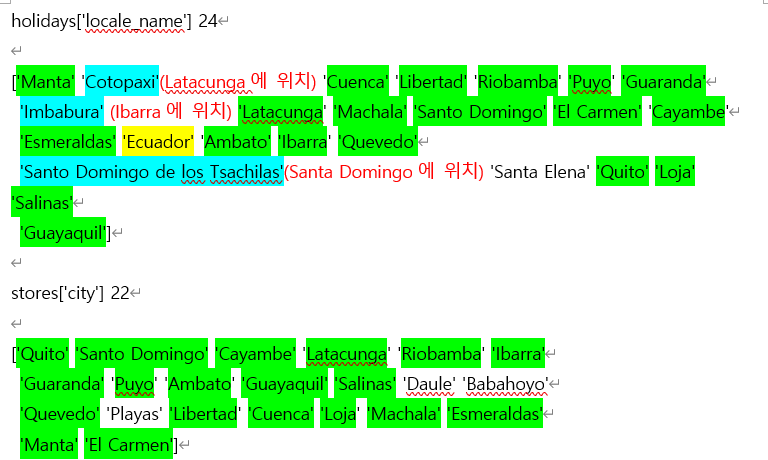

In [286]:
# holiays의 locale name 이름 변경
holidays.loc[holidays['locale_name']=='Cotopaxi','locale_name']='Latacunga'
holidays.loc[holidays['locale_name']=='Imbabura','locale_name']='Ibarra'
holidays.loc[holidays['locale_name']=='Santo Domingo de los Tsachilas','locale_name']='Santo Domingo'

In [291]:
# holidays의 locale name이 santa elena면 지우기. 
# 어짜피 우리가 있는 store의 city에 포함되지 않음
holidays=holidays[holidays['locale_name']!='Santa Elena']
holidays['locale_name'].nunique()

20

In [292]:
holidays['locale_name'].unique()

array(['Manta', 'Latacunga', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Ibarra', 'Machala', 'Santo Domingo', 'El Carmen',
       'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato', 'Quevedo', 'Quito',
       'Loja', 'Salinas', 'Guayaquil'], dtype=object)

In [331]:
holidays.tail()

,date,locale,locale_name
322,2017-12-22,National,Ecuador
323,2017-12-23,National,Ecuador
324,2017-12-24,National,Ecuador
325,2017-12-25,National,Ecuador
326,2017-12-26,National,Ecuador


In [335]:
# 날짜 범위 생성
date_range = pd.date_range(start='2012-03-02', end='2017-12-26')

# 'city' 값 리스트 생성
cities = ['Manta', 'Latacunga', 'Cuenca', 'Libertad', 'Riobamba',
          'Puyo', 'Guaranda', 'Ibarra', 'Machala', 'El Carmen', 'Santo Domingo',
          'Cayambe', 'Guayaquil', 'Esmeraldas', 'Ambato', 'Quevedo', 'Quito',
          'Loja', 'Salinas']

# 각 날짜에 대해 'city' 값을 반복하여 리스트 생성
holidays_p= {'date': np.repeat(date_range, len(cities)),
        'city': np.tile(cities, len(date_range))}

#holidays_p['date'] = holidays_p['date'].dt.strftime('%Y-%m-%d')
# 데이터프레임 생성
holidays_p = pd.DataFrame(holidays_p)
# 결과 출력
holidays_p.head()

,date,city
0,2012-03-02,Manta
1,2012-03-02,Latacunga
2,2012-03-02,Cuenca
3,2012-03-02,Libertad
4,2012-03-02,Riobamba


In [336]:
holidays.head()

,date,locale,locale_name
0,2012-03-02,Local,Manta
1,2012-04-01,Regional,Latacunga
2,2012-04-12,Local,Cuenca
3,2012-04-14,Local,Libertad
4,2012-04-21,Local,Riobamba


In [337]:
# 각 'holidays'와 'holidays_p'의 조건에 따라 'holiday' 값을 설정
holidays_p['holiday']=0
for index, row in holidays.iterrows():
    # 'date'와 'locale_name'이 일치하면 'holidays_p'의 'holiday' 값을 1로 설정
    holidays_p.loc[(holidays_p['date'] == row['date']) & (holidays_p['city'] == row['locale_name']), 'holiday'] = 1

    # 'locale_name'이 'Ecuador'라면 해당 날짜의 모든 'holiday' 값을 1로 설정
    if row['locale_name'] == 'Ecuador':
        holidays_p.loc[holidays_p['date'] == row['date'], 'holiday'] = 1

In [338]:
holidays_p.head()

,date,city,holiday
0,2012-03-02,Manta,1
1,2012-03-02,Latacunga,0
2,2012-03-02,Cuenca,0
3,2012-03-02,Libertad,0
4,2012-03-02,Riobamba,0


In [347]:
# holidays 데이터에서 train데이터의 date까지만 추출하기

# 날짜 범위 설정
start_date = '2013-01-01'
end_date = '2017-08-15'

# 특정 날짜 범위에 해당하는 행 추출
filtered_holidays = holidays_p[(holidays_p['date'] >= start_date) & (holidays_p['date'] <= end_date)]

filtered_holidays.reset_index(inplace=True)
filtered_holidays.drop('index',axis=1,inplace=True)
# 결과 출력
filtered_holidays.head()

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10132\3012194060.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_holidays.drop('index',axis=1,inplace=True)


,date,city,holiday
0,2013-01-01,Manta,1
1,2013-01-01,Latacunga,1
2,2013-01-01,Cuenca,1
3,2013-01-01,Libertad,1
4,2013-01-01,Riobamba,1


In [348]:
filtered_holidays.tail()

,date,city,holiday
32067,2017-08-15,Ambato,0
32068,2017-08-15,Quevedo,0
32069,2017-08-15,Quito,0
32070,2017-08-15,Loja,0
32071,2017-08-15,Salinas,0


## 데이터 병합하기

In [61]:
print(train.shape)
print(holidays.shape)
print(oil.shape)
print(stores.shape)
print(test.shape)

(3000888, 6)
(333, 3)
(1218, 2)
(54, 5)
(28512, 5)


In [212]:
# train과 stores 데이터를 stores_nbr을 기준으로 병합하기
merged_train1 = pd.merge(train, stores, on='store_nbr', how='inner')
merged_train1.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [213]:
merged_train1.shape

(3000888, 10)

In [214]:
# merged_train1과 oil 데이터를 date기준으로 병합하기
merged_train2 = pd.merge(merged_train1, oil_p, on='date', how='inner')
merged_train2.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14


In [215]:
merged_train2.shape

(3000888, 11)

In [349]:
filtered_holidays.head()

,date,city,holiday
0,2013-01-01,Manta,1
1,2013-01-01,Latacunga,1
2,2013-01-01,Cuenca,1
3,2013-01-01,Libertad,1
4,2013-01-01,Riobamba,1


In [352]:
filtered_holidays['date']=filtered_holidays['date'].dt.strftime('%Y-%m-%d')

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_10132\3985057128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_holidays['date']=filtered_holidays['date'].dt.strftime('%Y-%m-%d')


In [353]:
# merged_train2과 stores 데이터를 stores_nbr기준으로 병합하기
# 이때  state,city 열은 중복
merged_train3 = pd.merge(merged_train2, filtered_holidays, on=['date','city'], how='outer')
merged_train3.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,holiday
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13.0,93.14,1.0
1,1.0,2013-01-01,1.0,BABY CARE,0.0,0.0,Quito,Pichincha,D,13.0,93.14,1.0
2,2.0,2013-01-01,1.0,BEAUTY,0.0,0.0,Quito,Pichincha,D,13.0,93.14,1.0
3,3.0,2013-01-01,1.0,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13.0,93.14,1.0
4,4.0,2013-01-01,1.0,BOOKS,0.0,0.0,Quito,Pichincha,D,13.0,93.14,1.0


In [354]:
merged_train3.shape

(3000964, 12)

In [359]:
merged_train2.shape

(3000888, 11)

In [361]:
merged_train3.isnull().sum()

id                 76
date                0
store_nbr          76
family             76
sales              76
onpromotion        76
city                0
state              76
type               76
cluster            76
dcoilwtico         76
holiday        166716
dtype: int64

In [362]:
# holiday의 nan값은 holiday가 아님을 의미
# 따라서 0으로 채우기
merged_train3['holiday']=merged_train3['holiday'].fillna(0)

In [363]:
merged_train3[pd.isnull(merged_train3['id'])]

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,holiday
3000888,NaN,2013-12-25,NaN,NaN,NaN,NaN,Manta,NaN,NaN,NaN,NaN,1.0
3000889,NaN,2013-12-25,NaN,NaN,NaN,NaN,Latacunga,NaN,NaN,NaN,NaN,1.0
3000890,NaN,2013-12-25,NaN,NaN,NaN,NaN,Cuenca,NaN,NaN,NaN,NaN,1.0
3000891,NaN,2013-12-25,NaN,NaN,NaN,NaN,Libertad,NaN,NaN,NaN,NaN,1.0
3000892,NaN,2013-12-25,NaN,NaN,NaN,NaN,Riobamba,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3000959,NaN,2016-12-25,NaN,NaN,NaN,NaN,Ambato,NaN,NaN,NaN,NaN,1.0
3000960,NaN,2016-12-25,NaN,NaN,NaN,NaN,Quevedo,NaN,NaN,NaN,NaN,1.0
3000961,NaN,2016-12-25,NaN,NaN,NaN,NaN,Quito,NaN,NaN,NaN,NaN,1.0
3000962,NaN,2016-12-25,NaN,NaN,NaN,NaN,Loja,NaN,NaN,NaN,NaN,1.0


In [364]:
# 아마도 원래 데이터에서 12월 25일 칼럼이 아예 없는 거 같음
# 이를 지우기
# 'id'가 NaN인 행 지우기
merged_train3 = merged_train3.dropna(subset=['id'])

In [365]:
merged_train3.shape

(3000888, 12)

In [366]:
# 최종 데이터 생성
merged_train3.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,holiday
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13.0,93.14,1.0
1,1.0,2013-01-01,1.0,BABY CARE,0.0,0.0,Quito,Pichincha,D,13.0,93.14,1.0
2,2.0,2013-01-01,1.0,BEAUTY,0.0,0.0,Quito,Pichincha,D,13.0,93.14,1.0
3,3.0,2013-01-01,1.0,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13.0,93.14,1.0
4,4.0,2013-01-01,1.0,BOOKS,0.0,0.0,Quito,Pichincha,D,13.0,93.14,1.0


In [367]:
merged_train3['family'].value_counts()
# 이거 onhotencoding할 예정

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [368]:
merged_train3['city'].value_counts()
# 이것도 원핫 인코딩. holidays 변수가 city에 따라 달라지기 때문에
# state 변수는 의미가 없을듯 -> 하지만 family에 영향을 줄지도.. 일단은 안지우겠음

Quito            1000296
Guayaquil         444576
Santo Domingo     166716
Cuenca            166716
Latacunga         111144
Manta             111144
Machala           111144
Ambato            111144
Quevedo            55572
Esmeraldas         55572
Loja               55572
Libertad           55572
Playas             55572
Daule              55572
Babahoyo           55572
Cayambe            55572
Salinas            55572
Puyo               55572
Guaranda           55572
Ibarra             55572
Riobamba           55572
El Carmen          55572
Name: city, dtype: int64